# Introduction to Seaborn

__Purpose:__
The purpose of this lecture is to learn how to visualize data in Python using a library called **SEABORN**. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

__At the end of this lecture you will be able to:__
> 1. Understand how to create basic charts such as violin plots, boxplots, pair plots, joint plots, etc.
> 2. Use FacetGrid to create plot multiples

There are other libraries such as: bokeh, ggplot, pygal, plotly, geoplotlib, gleam, missingno, leather

## 1 Matplotlib

Let's start by importing matplotlib and creating a simple graph.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

We will be working with the Iris dataset.  This dataset contains informations about the sepal length, sepal width, petal length, petal width, and the type of iris (setosa, versicolor, vitginica).

In [2]:
# let's load the data and store it in a Pandas DataFrame
iris = datasets.load_iris()
data = pd.DataFrame(iris.data[:, :4],columns = iris.feature_names)
data['target'] = iris.target # 0-'setosa', 1-'versicolor', 2-'virginica'
data.target.replace(to_replace=[0,1,2], value=iris.target_names, inplace=True)

Let's observe a few random samples from our dataset.

In [3]:
data.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
108,6.7,2.5,5.8,1.8,virginica
22,4.6,3.6,1.0,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
49,5.0,3.3,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa


Let's use matplotlib to visualize a histogram of the Sepal Length.

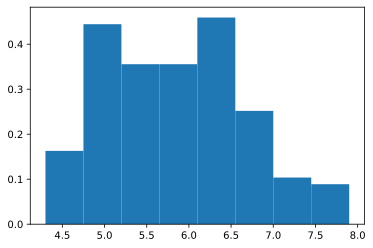

In [4]:
plt.hist(data['sepal length (cm)'],bins = 8, density=True);

## 2 Seaborn

Let's now import the Seaborn library and plot the histogram of the Sepal Length.

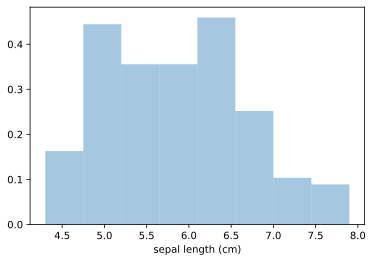

In [5]:
import seaborn as sns

sns.distplot(data['sepal length (cm)'], kde=False,bins=8,norm_hist=True);

The Seaborn visualization has a different formatting for the graph!  It has nicer defaults than matplotlib.  However, it's usefulness is in some of the advanced charts it contains. 

### 2.1 Seaborn Basics

### 2.1.1 KDE Plots and Distribution Plots


Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

We can plot this using kdeplot()

### Example 1 (Creating a KDE Plot)

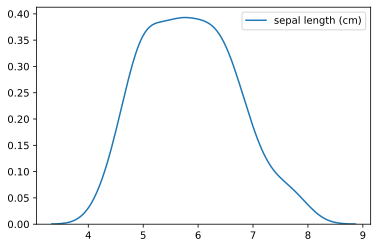

In [6]:
sns.kdeplot(data['sepal length (cm)']);

### Example 2 (Creating a Distribution Plot)

We can also combine the histogram and kdeplot into one chart using a distplot().

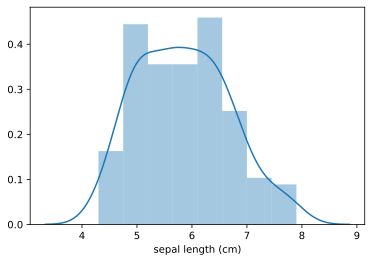

In [7]:
sns.distplot(data['sepal length (cm)'],bins=8);

### 2.1.2 Barplots

We can also create bar plots.

### Example 1 (Creating a Bar Plot)
We can represent the average Sepal Length for each type of Iris.

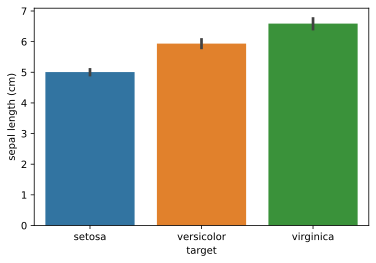

In [8]:
sns.barplot(x = 'target',y='sepal length (cm)',data=data);

### Problem 1:

Create a horizontal barplot of the petal width by target.  The order of the bars should be 'Virginica', 'Versicolor' and 'Setosa' (from top to bottom).

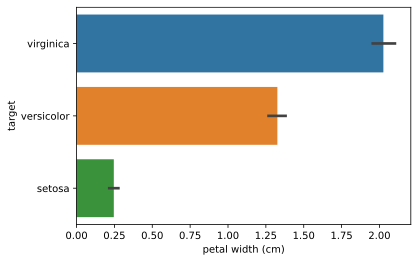

In [9]:
sns.barplot(x='petal width (cm)',y = 'target',data=data,order=('virginica','versicolor','setosa'));

### 2.1.3 Boxplot

We can also create box plots which are defined by the chart below.
<img src="Img/Box-Plot-MTB_01.png">



### Example 1 (Create a Box Plot)
Let's create a box plot for each of the numerical features in our dataset.

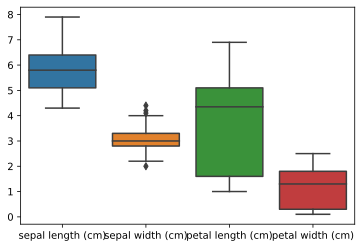

In [10]:
sns.boxplot(data=data);

Note that it only plots the numerical columns (i.e. the "target" column is not presented because it is a string.

### Example 2 (Create a Box Plot by Target)
In this example we use the pandas boxplot and separate the data by the "target" column.

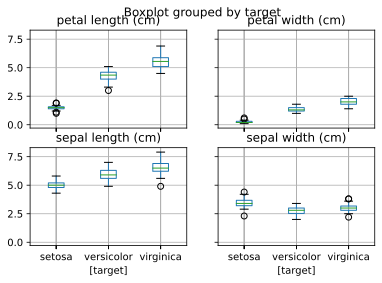

In [11]:
data.boxplot(by = 'target');

### 2.1.4 Violin Plot

### Example 1 (Create a Violin Plot)
A Violin Plot is similar to Box Plot with a rotated kernel density plot on each side.

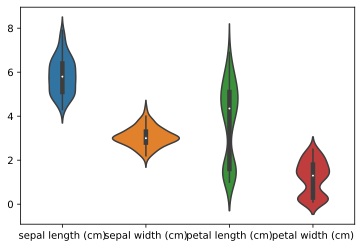

In [12]:
sns.violinplot(data=data);

### 2.1.5 PairPlot

Plots each numerical variable against each other.  When it's comparing a value against itself, it crates a histogram or kde.

### Example 1 (Create a PairPlot)

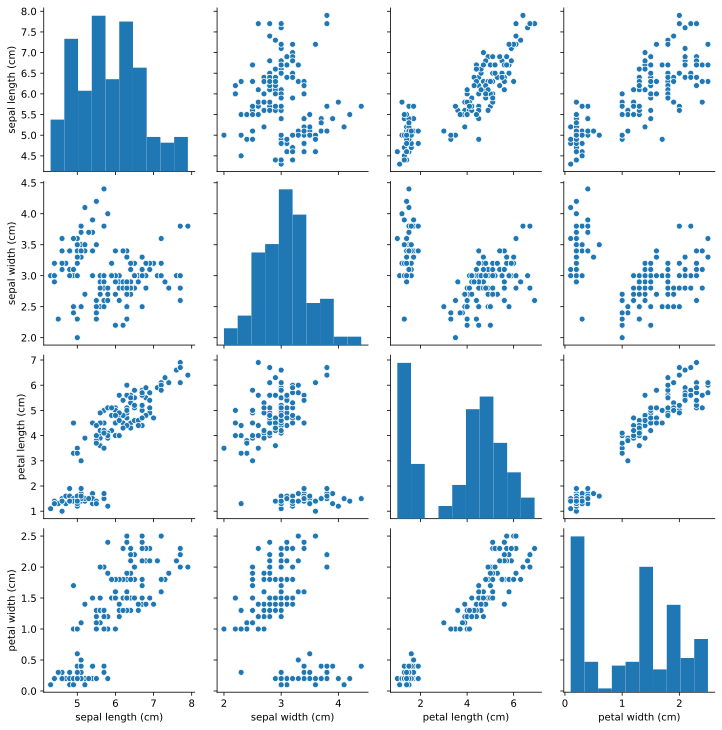

In [13]:
sns.pairplot(data);

### Problem 2 

Create a Pair Plot with kde on its diagonal and hue by "target".

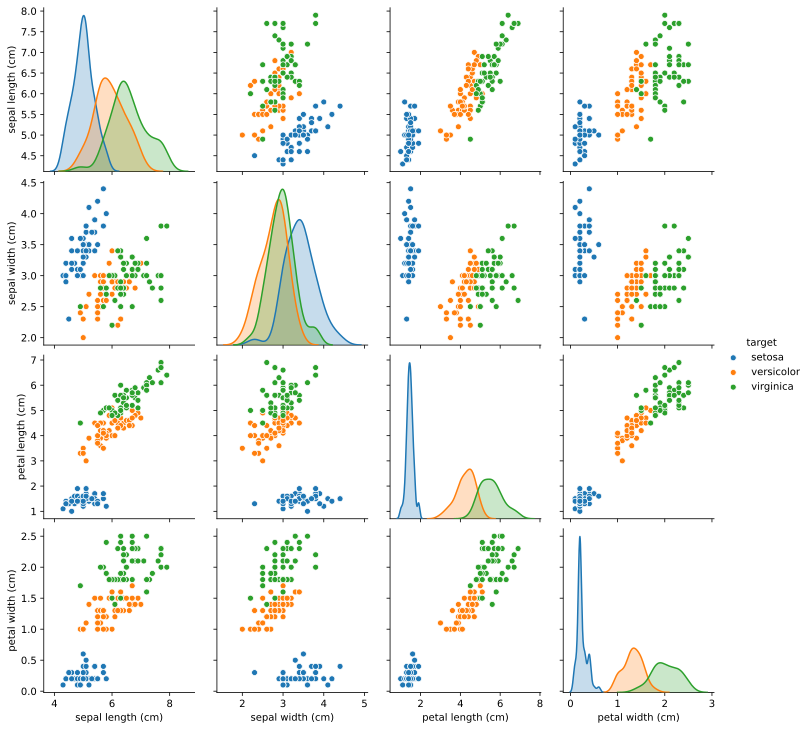

In [14]:
sns.pairplot(data, hue='target',diag_kind='kde');



### 2.1.6 Joint Plot

Draws a plot of two variables with bivariate and univariate graphs.

### Example 1 (Create a Joint Plot)
Here we will plot the Petal Length and Width as a Joint Plot.

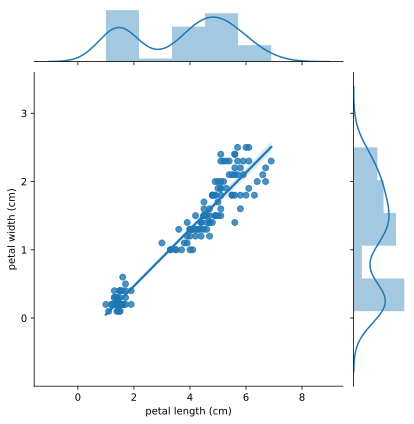

In [15]:
sns.jointplot("petal length (cm)", "petal width (cm)", kind="regplot", data=data);

### Problem 3:

Create a jointplot using a different kind of plot to draw, and change the color map.

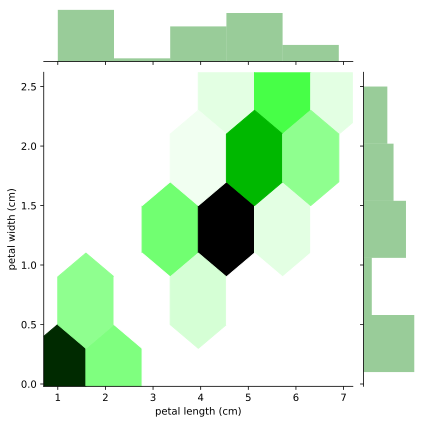

In [18]:
sns.jointplot("petal length (cm)", "petal width (cm)", kind="hex", data=data, color='g');

### 2.1.7 Heatmap

### Example 1 (Create a Heatmap)

We will calculate the average of each column, grouped by the target, and visualize it with a heatmap.

In [19]:
avrg = data.groupby(by = ['target']).mean()
avrg

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


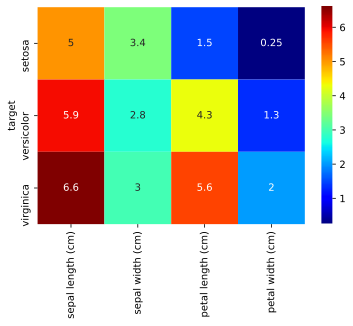

In [20]:
sns.heatmap(avrg,cmap='jet',annot=True);

### 2.2 FacetGrid

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.

### Example 1 (Create a FacetGrid)

We will split the data into 3 graphs (one per target type), and then create a distribution plot for the Sepal Length.

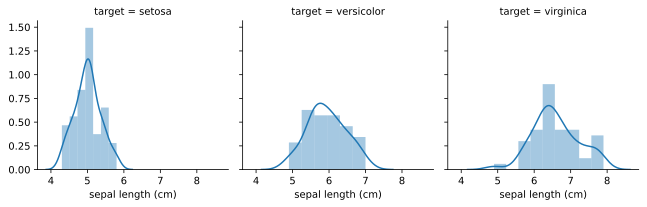

In [21]:
g = sns.FacetGrid(data, col='target', sharex=True, sharey=True)
g.map(sns.distplot, 'sepal length (cm)',norm_hist=False);

The sum of the bars multiplied by the bar width adds up to 1! This is why some bars can go above 1.

### 3 Formatting

### 3.1.1 Background

The background style can be modified.

### Example 1

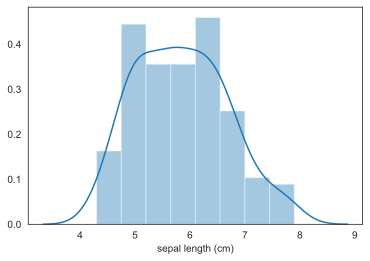

In [22]:
sns.set_style("white") # darkgrid, whitegrid, dark, white, ticks

sns.distplot(data['sepal length (cm)'],bins=8);

### 3.1.2 Despine

It is possible to remove the top and right spines using despine(). 

### Example 1

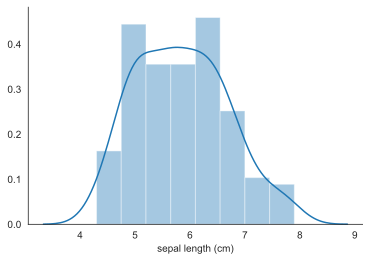

In [23]:
sns.distplot(data['sepal length (cm)'],bins=8);
sns.despine()

### 3.1.3 Color Palette

The color palette can be modified.  For details read here: https://seaborn.pydata.org/tutorial/color_palettes.html

### Example 1

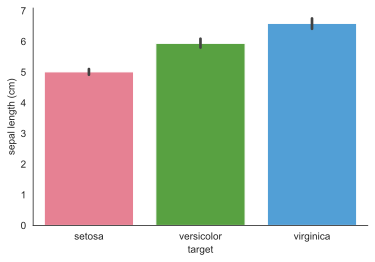

In [24]:
sns.barplot(x = 'target',y='sepal length (cm)',data=data,palette = sns.color_palette("husl", 3));
sns.despine()

### Books on exploratory data analysis (EDA)
[Exploratory Data Analysis by John Tukey](https://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160)

Other authors on EDA:

* William Cleveland
* Edward Tufte